Dimensionality Reduction in Machine Learning

Group Members: Michelle Ru, Staci Strader, Vrithik Umapathy, John Lopez

Abstract:

Dimensionality reduction techniques are vital in machine learning for simplifying complex datasets while preserving their essential structure, enabling computational efficiency and the visualization of high-dimensional data. Traditional methods like Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and Uniform Manifold Approximation and Projection (UMAP) are widely used, though they often introduce distortions when reducing dimensions to two or three. More advanced techniques, such as Pairwise Controlled Manifold Approximation Projection (PaCMAP) and Variational Autoencoders (VAEs), address these limitations by preserving both local and global data structures. In our work, we implemented UMAP, PaCMAP, and VAEs to analyze a high-dimensional RNA sequencing dataset. We fine-tuned hyperparameters such as the number of neighbors, minimum distance, and latent space dimensions to optimize performance, using cross-validation to maintain model robustness. Additionally, we evaluated accuracy through label classification, which displays the ability of these techniques to retain critical information. While these methods show great promise, challenges remain in high-dimensional spaces, prompting our exploration and implementation of semi-supervised approaches like multi-class, multi-level (MCML) algorithms, with hyperparameter tuning of kernel, gamma, and neighbors, to improve embedding quality and lessen limitations.  


References:

Kodžoman, V. Pseudo-labeling a simple semi-supervised learning method. Data, what now? https://datawhatnow.com/pseudo-labeling-semi-supervised-learning/ (accessed 2024-12-12).

ChatGPT, ver. 4; OpenAI: San Francisco, 2024. https://openai.com/chatgpt (accessed 2024-12-12).

Sharma, A. Variational Autoencoder in TensorFlow (Python Code). https://learnopencv.com/variational-autoencoder-in-tensorflow/ (accessed 2024-12-12).



A real RNA sequencing datset was used from an online free source. The dataset contains single cell RNA-seq data collected from the ventral part of the ventromedial hypothalamus.

https://data.mendeley.com/datasets/ypx3sw2f7c/3

***UMAP Code By Itself***

In [ ]:
#importing libraries as needed
import pandas as pd
import numpy as np
!pip install umap-learn
!pip install umap-learn[plot]
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from umap import UMAP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.9 MB/s eta 0:00:00


In [ ]:
#reading the csv file
data = pd.read_csv('cpm_30862.csv', on_bad_lines='skip')
data = data.dropna()
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,30828,30829,30830,30831,30832,30833,30834,30835,30836,30853
0,SM-GE4R1_S041_E1-50,0.0,0.0,137.836839,109.642940,9.397966,6.265311,37.591865,0.0,46.989831,...,0.00000,0.000000,1.566328,54.821470,0.000000,0.000000,0.000000,0.000000,136.270511,0.0
1,SM-GE4R1_S042_E1-50,0.0,0.0,138.316086,124.821834,0.000000,38.795975,15.181034,0.0,205.787347,...,43.85632,25.301723,0.000000,140.002868,13.494252,5.060345,106.267237,0.000000,96.146548,0.0
2,SM-GE4R1_S043_E1-50,0.0,0.0,143.019928,73.064528,0.000000,24.873031,3.109129,0.0,83.946479,...,0.00000,13.991080,0.000000,79.282786,0.000000,0.000000,4.663693,0.000000,144.574492,0.0
3,SM-GE4R1_S044_E1-50,0.0,0.0,70.960045,11.826674,0.000000,0.000000,1.478334,0.0,97.570062,...,0.00000,0.000000,0.000000,54.698368,35.480023,32.523354,50.263365,0.000000,147.833427,0.0
4,SM-GE4R1_S045_E1-50,0.0,0.0,76.100868,103.773911,0.000000,13.836521,0.000000,0.0,55.346086,...,0.00000,27.673043,0.000000,13.836521,0.000000,13.836521,55.346086,0.000000,83.019129,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4569,SM-GE65X_S92_E1-50,0.0,0.0,290.983565,158.672223,0.000000,22.812300,23.319240,0.0,206.324584,...,5.57634,0.000000,1.013880,14.194320,0.000000,0.000000,0.000000,0.000000,226.095244,0.0
4570,SM-GE65X_S93_E1-50,0.0,0.0,143.438310,181.921758,0.000000,0.000000,0.000000,0.0,86.879301,...,0.00000,0.000000,0.583083,49.562018,0.000000,6.413908,16.909394,0.000000,115.450347,0.0
4571,SM-GE65X_S94_E1-50,0.0,0.0,129.508656,182.835750,0.000000,36.458319,0.544154,0.0,0.544154,...,0.00000,0.544154,0.000000,17.412929,0.000000,17.957083,3.809078,0.000000,123.522962,0.0
4572,SM-GE65X_S95_E1-50,0.0,0.0,159.743712,94.864867,0.000000,10.904008,29.440821,0.0,0.000000,...,0.00000,34.347624,0.000000,65.424046,0.000000,27.260019,1.635601,0.000000,177.735325,0.0


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


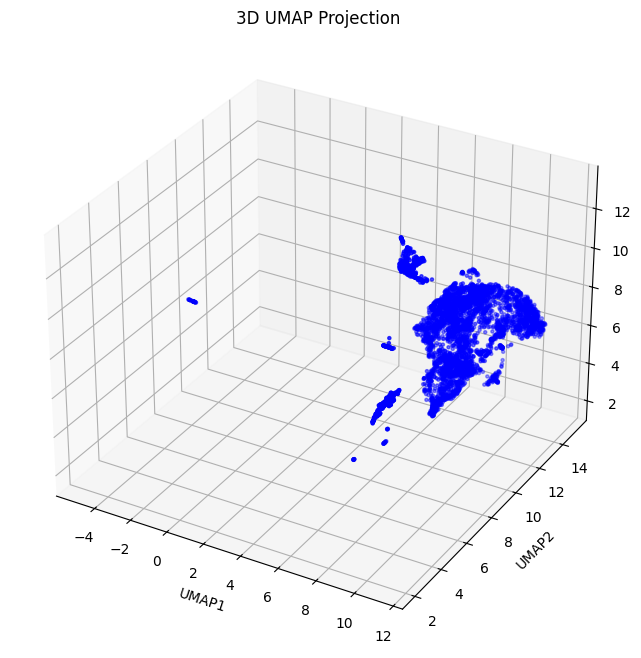

In [ ]:
#code showing UMAP by itself on an rna dataset and being clustered in 3D
import pandas as pd
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#extracting features from the dataset starting from column 1 since it is labels
features = data.iloc[:, 1:].values

#starting UMAP with 3 compnents for 3D embedding
reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(features)

#making a 3D plot to visulize UMAP embedding
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c='blue', s=5)

ax.set_title('3D UMAP Projection')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')

plt.show()

Shows clustering in 3D

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


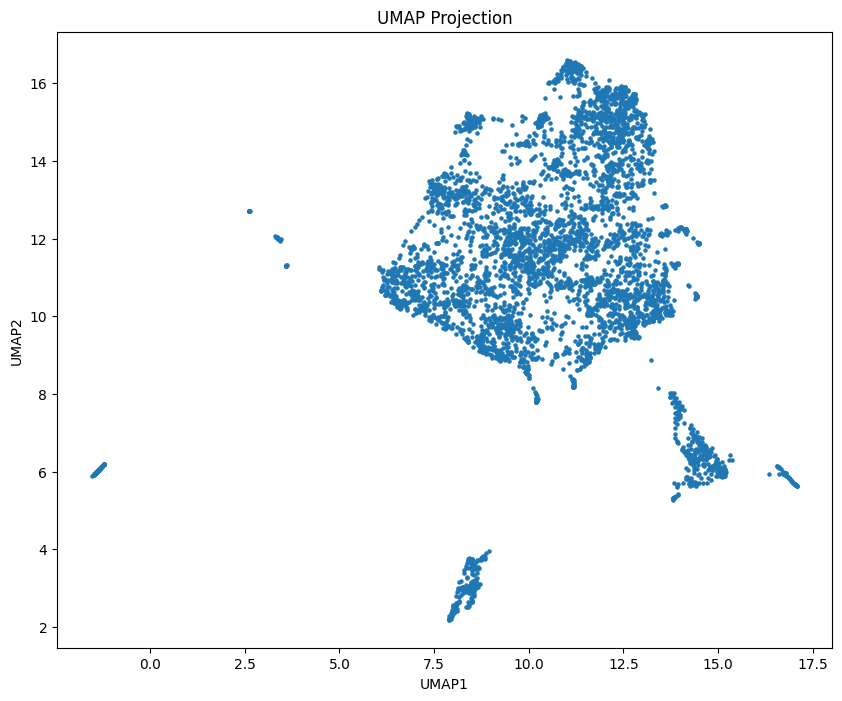

In [ ]:
#code showing UMAP by itself on a real human_liver rna dataset
import pandas as pd
import umap
import matplotlib.pyplot as plt

#extracting features from the dataset starting from column 1 since it is labels
features = data.iloc[:, 1:].values

#starting UMAP with its default settings
reducer = umap.UMAP(random_state=42)

#applying UMAP and clustering in 2D
embedding = reducer.fit_transform(features)

#making a 2D plot to visualize UMAP embedding
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5)

plt.title('UMAP Projection')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.show()

Shows clustering of data but no color association in 2D. Similarites can be taken according to location to one another on cluster graph. Runtime was short (under five minutes).

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


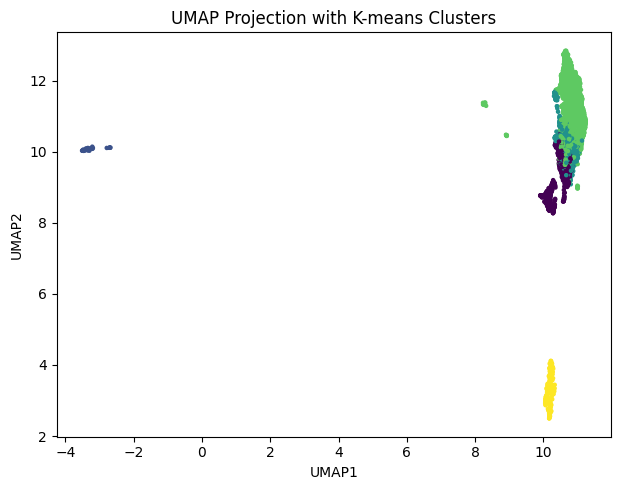

In [ ]:
#code showing UMAP as a dimensional reduction method then applying K-means cluster
import pandas as pd
import numpy as np
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#extracting features from the dataset starting from column 1 since it is labels
features = data.iloc[:, 1:].values

#using UMAP for dimensional reduction
reducer = umap.UMAP(n_components=10, random_state=42)

#applying UMAP as a dimensional reducer in 2D
umap_embedding = reducer.fit_transform(features)

#using K-means clustering to group the datset in 5 groups
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(umap_embedding)

#plotting UMAP results with K-means clusters
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('UMAP Projection with K-means Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.tight_layout()
plt.show()

Using UMAP as a dimensionality reducer before K-means allows for quicker run time but the clustering has become too tight. Runtime was also very short (under five minutes).

***UMAP Code with Hyperparameter Tuning and Cross Validation***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import silhouette_score
!pip install umap-learn
!pip install umap-learn[plot]
from umap import UMAP
import umap.umap_ as umap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#extracting features from the dataset starting from column 0 as all columns are data
features = data.iloc[:, 1:].values

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X_train, X_test = train_test_split(features_scaled, test_size=0.2, random_state=42)

In [9]:
#hyperparamter tuning and best paramaters
umap_param_grid = {
    'n_neighbors': [5, 10, 15],
    'min_dist': [0.1, 0.5, 0.9],
    'n_components': [2, 3]
}

#performing hyperparamter tuning for UMAP
best_umap_score = float('-inf')
best_umap_params = None

for n_neighbors in umap_param_grid['n_neighbors']:
  for min_dist in umap_param_grid['min_dist']:
    for n_components in umap_param_grid['n_components']:
      reducer = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=42)
      embedding = reducer.fit_transform(X_train)
      #K-means evaluation on reduced data
      kmeans = KMeans(n_clusters=5, random_state=42)
      clusters = kmeans.fit_predict(embedding)
      score = silhouette_score(embedding, clusters)
      if score > best_umap_score:
        best_umap_score = score
        best_umap_params = {'n_neighbors': n_neighbors, 'min_dist': min_dist, 'n_components': n_components}

#applying the best UMAP parameters to the full dataset
print("Best UMAP Parameters:", best_umap_params)
reducer = UMAP(**best_umap_params, random_state=42)
umap_embedding = reducer.fit_transform(features_scaled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr

Best UMAP Parameters: {'n_neighbors': 15, 'min_dist': 0.1, 'n_components': 2}


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
#K-means clustering and best K-means parameter
kmeans_param_grid = {'n_clusters': [3, 5, 7, 9]}
kmeans_best_score = float('-inf')
best_kmeans_params = None

for n_clusters in kmeans_param_grid['n_clusters']:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  clusters = kmeans.fit_predict(umap_embedding)
  score = silhouette_score(umap_embedding, clusters)
  if score > kmeans_best_score:
    kmeans_best_score = score
    best_kmeans_params = {'n_clusters': n_clusters}

print("Best K-means Parameters:", best_kmeans_params)
kmeans = KMeans(**best_kmeans_params, random_state=42)
clusters = kmeans.fit_predict(umap_embedding)

In [ ]:
#plotting an optimized UMAP embedding with K-means cluster
plt.figure(figsize=(10, 8))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('Optimized UMAP Projection with K-means Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.show()

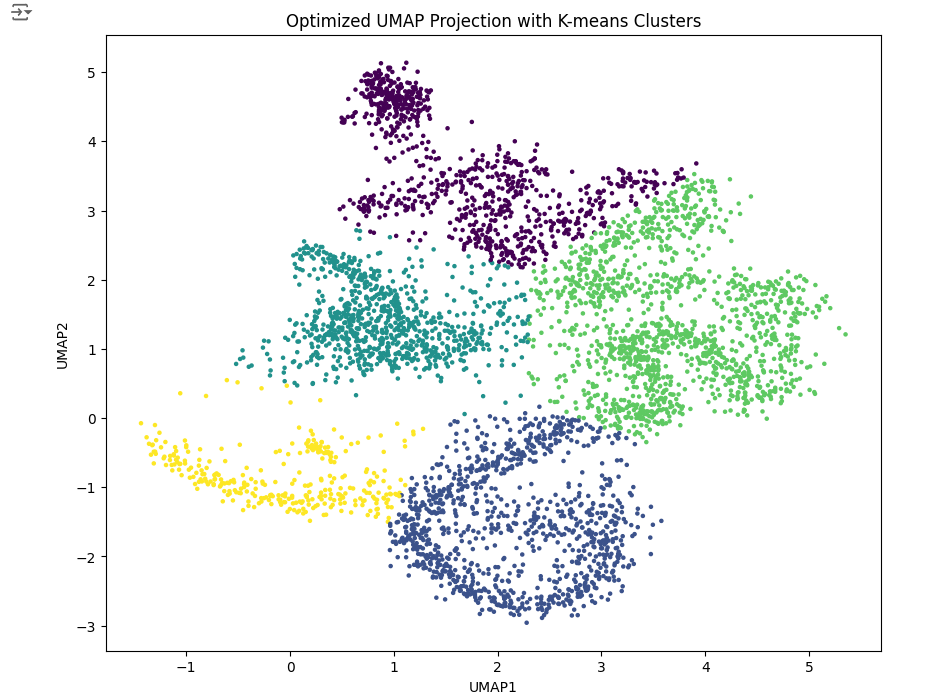

The original structure is kept muich better once you add hyperparameter tuning and cross validation when applying another clustering method to UMAP embedding.

In [ ]:
#finding knn score for test and train set after tuning and validation practices
X_train_umap, X_test_umap = train_test_split(umap_embedding, test_size=0.2, random_state=42)
y_train = clusters[:len(X_train_umap)]
y_test = clusters[len(X_train_umap):]
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_umap, y_train)
y_train_pred = knn.predict(X_train_umap)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = knn.predict(X_test_umap)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Score: 0.556789
Test Score: 0.0798233

Test and Training accuracy after hyperparameter tuning, cross validation on UMAP embedding with K-means clustering.

PaCMAP Code

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552448 sha256=7e15d696600127aa77b25c70a29fa6f6c53e09e60abdb82d3459be7e7d0ade35
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


Ideal neighbor pairs: 10
Ideal MN ratio: 0.8
Ideal FP ratio: 5


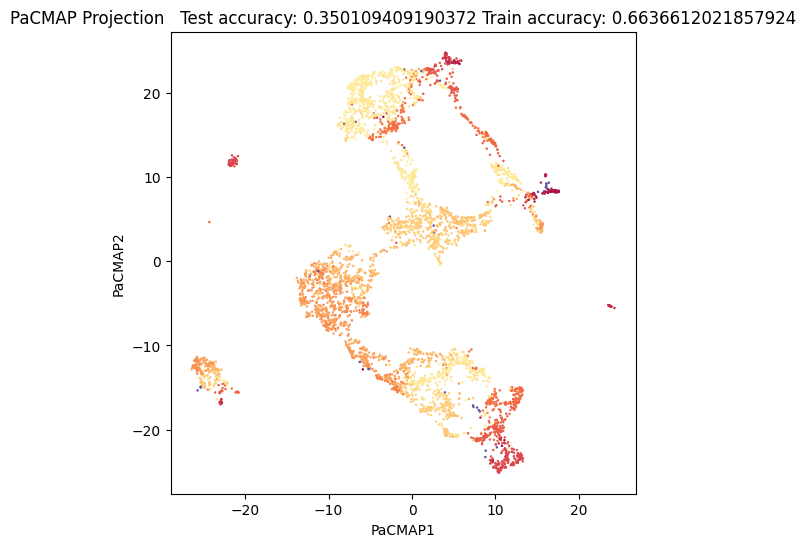

In [ ]:
# Import modules
!pip install pacmap
import pacmap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
#Upload Data
data = pd.read_csv('cpm_30862.csv')
labels = pd.read_csv('SMART-seq_VMH_metadata.csv')
labels = labels.set_index('sample_name')
ids = data.iloc[:, :1]
ids = ids['Unnamed: 0']
#put the labels in the same order as the data
color_label = []
for i,label in enumerate(ids):
    color_label.append(labels.loc[f'{label}', 'smart_seq_cluster_id'])

labels  = [color_label,ids]
labels = np.array(labels).T
color_label = np.array(color_label)
#Get the features and scale them
feature = data.iloc[:, 1:].values
features = StandardScaler().fit_transform(feature)
#Values Used for hyperparameter serach
MN_rat = [0.4,0.6,0.8]
FP_rat = [3,4,5]
Nn = [10,20,30]
n_splits = [5]
accuracy_score = 0
knn = KNeighborsClassifier(n_neighbors=5)
#Hyperparameter search
for M, mn in enumerate(MN_rat):
    for F, fp in enumerate(FP_rat):
        for N, NN in enumerate(Nn):
            #Stratified KFold
            for n in n_splits:
                skf = StratifiedKFold(n_splits=5)
                for train_index, test_index in skf.split(features, color_label):
                    X_train, X_test = features[train_index], features[test_index]
                    y_train, y_test = color_label[train_index], color_label[test_index]
                reducer = pacmap.PaCMAP(n_components=2, n_neighbors=NN, MN_ratio=mn, FP_ratio=fp, random_state = 42)
                knn.fit(reducer.fit_transform(X_train), y_train)
                accuracy_train = knn.score(reducer.fit_transform(X_train), y_train)
                accuracy = knn.score(reducer.transform(X_test, basis = X_train), y_test)
                if accuracy >accuracy_score:
                    accuracy_score = accuracy
                    acc_train = accuracy_train
                    Ne_Neighbors = NN
                    mid_near = mn
                    further_pair = fp
print("Ideal neighbor pairs:", Ne_Neighbors)
print("Ideal MN ratio:", mid_near)
print("Ideal FP ratio:", further_pair)
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=Ne_Neighbors, MN_ratio=mid_near, FP_ratio=further_pair, random_state = 42)
X_transformed = embedding.fit_transform(features, init="pca")
#Find the overall accuracy
accuracy = knn.score(X_transformed, color_label)
#make scatter plot of data
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1],s=0.6, cmap="Spectral", c=color_label)
ax.set_title(f'PaCMAP Projection   Test accuracy: {accuracy_score} Train accuracy: {acc_train}')
ax.set_xlabel('PaCMAP1')
ax.set_ylabel('PaCMAP2')
plt.show()








***VAE Code***

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Layer, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('cpm_30862.csv', on_bad_lines='skip').dropna()
labels = pd.read_csv('SMART-seq_VMH_metadata.csv', on_bad_lines='skip').dropna()

data.reset_index(drop=True, inplace=True)
labels.reset_index(drop=True, inplace=True)

if data.shape[0] != labels.shape[0]:
    common_indices = data.index.intersection(labels.index)
    data = data.loc[common_indices].reset_index(drop=True)
    labels = labels.loc[common_indices].reset_index(drop=True)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")
print(labels)
labels = labels.iloc[:, 1].values
print(labels)
features = data.iloc[:, 1:].values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

Data shape: (1078, 27872)
Labels shape: (1078, 22)
              sample_name  smart_seq_cluster_id smart_seq_cluster_label  \
0     SM-GE4R2_S062_E1-50                    46         Nr5a1_9|11 Rorb   
1     SM-GE4SI_S356_E1-50                    46         Nr5a1_9|11 Rorb   
2     SM-GE4SI_S172_E1-50                    46         Nr5a1_9|11 Rorb   
3     SM-GE4R1_S166_E1-50                    42        Nr5a1_4|7 Glipr1   
4     SM-GE4R1_S168_E1-50                    46         Nr5a1_9|11 Rorb   
...                   ...                   ...                     ...   
1073  SM-GE4SI_S265_E1-50                    20    Nr5a1_Foxp2_1 Prdm13   
1074  SM-GE4SI_S169_E1-50                    20    Nr5a1_Foxp2_1 Prdm13   
1075   SM-D9D7G_S25_E1-50                    20    Nr5a1_Foxp2_1 Prdm13   
1076   SM-D9D7M_S89_E1-50                    20    Nr5a1_Foxp2_1 Prdm13   
1077   SM-D9E6R_S81_E1-50                    20    Nr5a1_Foxp2_1 Prdm13   

     smart_seq_cluster_color  animal_name_id ani

In [ ]:
tf.random.set_seed(42)

input_dim = scaled_data.shape[1]
latent_dim = 2
# Encoder
inputs = Input(shape=(input_dim,))
h = Dense(128, activation='relu', kernel_initializer='he_normal')(inputs)
h = BatchNormalization()(h)
z_mean = Dense(latent_dim, name='z_mean')(h)
z_log_var = Dense(latent_dim, name='z_log_var')(h)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(K.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

# Decoder
decoder_h = Dense(128, activation='relu', kernel_initializer='he_normal')
h_decoded = decoder_h(z)
h_decoded_bn = BatchNormalization()(h_decoded)
decoder_output = Dense(input_dim)
outputs = decoder_output(h_decoded_bn)

class VAELossLayer(Layer):
    def call(self, inputs):
        x, outputs, z_mean, z_log_var = inputs
        reconstruction_loss = tf.reduce_mean(tf.reduce_sum(tf.square(x - outputs), axis=1))
        kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
        total_loss = reconstruction_loss + kl_loss
        self.add_loss(total_loss)
        return outputs


vae_outputs = VAELossLayer()([inputs, outputs, z_mean, z_log_var])
vae = Model(inputs, vae_outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

vae.compile(optimizer=optimizer)
vae.fit(scaled_data, scaled_data, epochs=50, batch_size=32)
encoder = Model(inputs, z_mean)
latent_space = encoder.predict(scaled_data)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 26602.8926
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 26134.3555
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25833.5957
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25689.6211
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25610.2051
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25567.2871
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25545.6504
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25509.5254
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25486.4863
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25475.5156
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 25458.5469
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25441.5723
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 25424.3066
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25420.7891
Epoch 15/50
34/34 ━━━━━━━━━━

In [ ]:
num_labels = len(np.unique(labels))
print(labels)
print(num_labels)
# On original data
kmeans_orig = KMeans(n_clusters=num_labels, random_state=42).fit(scaled_data)
clusters_orig = kmeans_orig.labels_
# On latent space
kmeans_latent = KMeans(n_clusters=num_labels, random_state=42).fit(latent_space)
clusters_latent = kmeans_latent.labels_

[46 46 46 ... 20 20 20]
26


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


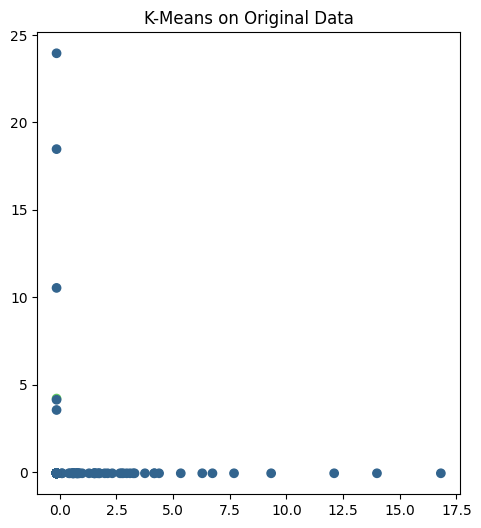

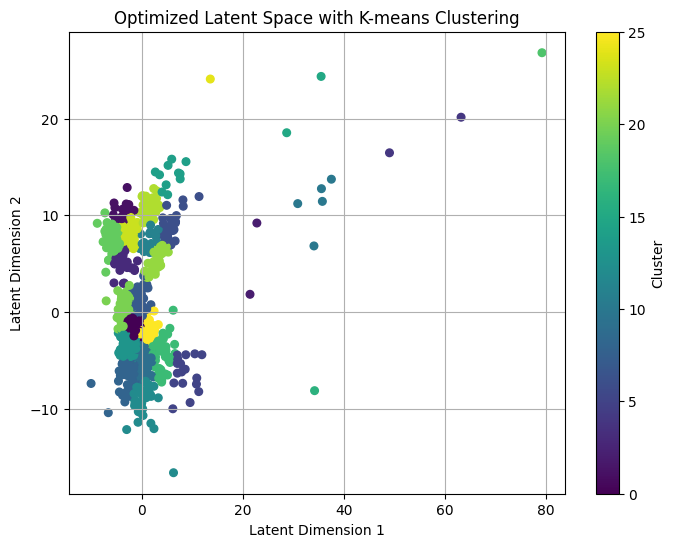

In [ ]:
encoder = Model(vae.input, vae.get_layer('z_mean').output)
latent_space = encoder.predict(scaled_data)
kmeans = KMeans(n_clusters=num_labels, random_state=42)
clusters = kmeans.fit_predict(latent_space)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters_orig, cmap='viridis')
plt.title('K-Means on Original Data')

plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_space[:, 0], latent_space[:, 1], c=clusters, cmap='viridis', s=30)
plt.colorbar(scatter, label='Cluster')
plt.title('Optimized Latent Space with K-means Clustering')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.grid(True)
plt.show()

From K-Means on the original data to the K-Means on the latent space of the VAE, we can see that there is significantly more meaning as the data has more variance and a more uniform distribution.

VAE Hyperparameter tuning


In [ ]:
param_grid = {
    'latent_dim': [2],
    'intermediate_dim': [64, 128, 256],
    'learning_rate': [1e-3, 1e-4, 1e-5]
}

def create_vae(latent_dim, intermediate_dim, learning_rate):
    input_dim = scaled_data.shape[1]

    # Encoder
    inputs = Input(shape=(input_dim,))
    h = Dense(intermediate_dim, activation='relu', kernel_initializer='he_normal')(inputs)
    h = BatchNormalization()(h)
    z_mean = Dense(latent_dim, name='z_mean')(h)
    z_log_var = Dense(latent_dim, name='z_log_var')(h)

    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.random.normal(shape=(K.shape(z_mean)[0], latent_dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = Lambda(sampling)([z_mean, z_log_var])

    # Decoder
    decoder_h = Dense(intermediate_dim, activation='relu', kernel_initializer='he_normal')
    h_decoded = decoder_h(z)
    h_decoded_bn = BatchNormalization()(h_decoded)
    decoder_output = Dense(input_dim)
    outputs = decoder_output(h_decoded_bn)

    class VAELossLayer(Layer):
        def call(self, inputs):
            x, outputs, z_mean, z_log_var = inputs
            reconstruction_loss = tf.reduce_mean(tf.reduce_sum(tf.square(x - outputs), axis=1))
            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
            total_loss = reconstruction_loss + kl_loss
            self.add_loss(total_loss)
            return outputs

    vae_outputs = VAELossLayer()([inputs, outputs, z_mean, z_log_var])
    vae = Model(inputs, vae_outputs)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    vae.compile(optimizer=optimizer)

    return vae

best_loss = np.inf
best_params = None
history_per_param = {}

for latent_dim in param_grid['latent_dim']:
    for intermediate_dim in param_grid['intermediate_dim']:
        for learning_rate in param_grid['learning_rate']:
            print(f"Testing combination: latent_dim={latent_dim}, intermediate_dim={intermediate_dim}, learning_rate={learning_rate}")
            vae = create_vae(latent_dim, intermediate_dim, learning_rate)

            history = vae.fit(
                scaled_data, scaled_data,
                validation_split=0.2,
                epochs=50,
                batch_size=32,
                verbose=0
            )

            final_val_loss = history.history['val_loss'][-1]
            history_per_param[(latent_dim, intermediate_dim, learning_rate)] = final_val_loss

            if final_val_loss < best_loss:
                best_loss = final_val_loss
                best_params = (latent_dim, intermediate_dim, learning_rate)

print(f"\nBest Parameters: latent_dim={best_params[0]}, intermediate_dim={best_params[1]}, learning_rate={best_params[2]}")
print(f"Best Validation Loss: {best_loss}")


Testing combination: latent_dim=2, intermediate_dim=64, learning_rate=0.001
Testing combination: latent_dim=2, intermediate_dim=64, learning_rate=0.0001
Testing combination: latent_dim=2, intermediate_dim=64, learning_rate=1e-05
Testing combination: latent_dim=2, intermediate_dim=128, learning_rate=0.001
Testing combination: latent_dim=2, intermediate_dim=128, learning_rate=0.0001
Testing combination: latent_dim=2, intermediate_dim=128, learning_rate=1e-05
Testing combination: latent_dim=2, intermediate_dim=256, learning_rate=0.001
Testing combination: latent_dim=2, intermediate_dim=256, learning_rate=0.0001
Testing combination: latent_dim=2, intermediate_dim=256, learning_rate=1e-05

Best Parameters: latent_dim=2, intermediate_dim=128, learning_rate=1e-05
Best Validation Loss: 27586.521484375


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


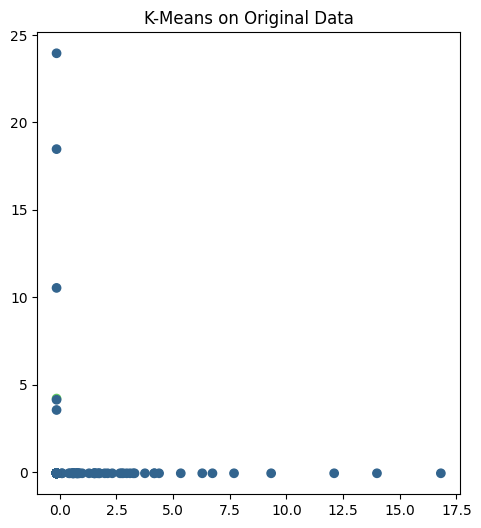

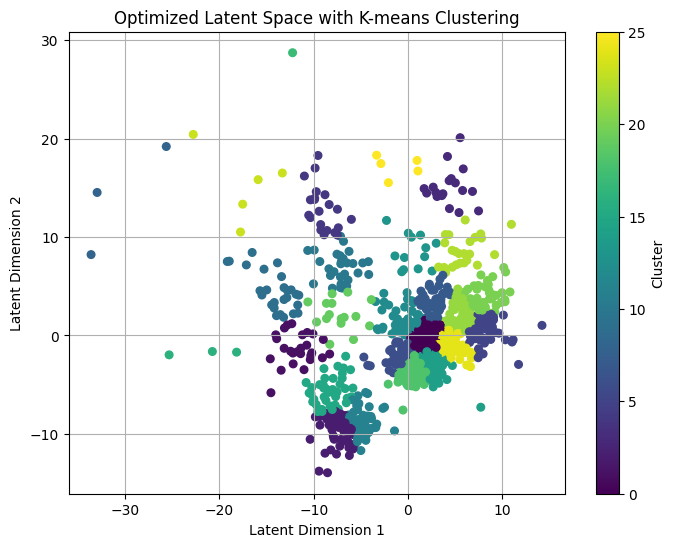

In [ ]:
best_latent_dim, best_intermediate_dim, best_learning_rate = best_params
vae = create_vae(best_latent_dim, best_intermediate_dim, best_learning_rate)
vae.fit(scaled_data, scaled_data, epochs=50, batch_size=32, verbose=0)

encoder = Model(vae.input, vae.get_layer('z_mean').output)
latent_space = encoder.predict(scaled_data)
kmeans = KMeans(n_clusters=num_labels, random_state=42)
clusters = kmeans.fit_predict(latent_space)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters_orig, cmap='viridis')
plt.title('K-Means on Original Data')

plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_space[:, 0], latent_space[:, 1], c=clusters, cmap='viridis', s=30)
plt.colorbar(scatter, label='Cluster')
plt.title('Optimized Latent Space with K-means Clustering')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.grid(True)
plt.show()

Now, when comparing K-Means on the original data in regards to K-means on the VAE optimized latent space, we can see that the VAE better fits the underlying distribution, allowing for a more interpretable result.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

print("Latent Space Shape:", latent_space.shape)
print("Labels Shape:", len(labels))

if latent_space.shape[0] != len(labels):
    raise ValueError("Mismatch between latent_space and labels.")

X_train_latent, X_test_latent, y_train, y_test = train_test_split(
    latent_space, labels, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=50)
cv_scores = cross_val_score(knn, X_train_latent, y_train, cv=5, scoring='accuracy')
mean_cv_score = np.mean(cv_scores)
knn.fit(X_train_latent, y_train)
y_train_pred = knn.predict(X_train_latent)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = knn.predict(X_test_latent)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Cross-Validation Accuracy (5-fold): {mean_cv_score:.2f}")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Latent Space Shape: (1078, 2)
Labels Shape: 1078


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy (5-fold): 0.36
Training Accuracy: 0.39
Test Accuracy: 0.34


From cross validation and test accuracy, we can see that VAE's performance on helping reduce dimensionality and determine underlying trends has room for improvement. With that being said, there may be other dimensionality reduction techniques that lead to a greater classificatio accuracy.

**Semi Supervised Model Approach**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.semi_supervised import LabelPropagation
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


data = pd.read_csv('cpm_30862.csv')


In [ ]:
imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(data.iloc[:, 1:])

labels = np.random.choice([0, 1], size=features.shape[0])

X_train, X_unlabeled, y_train, y_unlabeled = train_test_split(features, labels, test_size=0.1, random_state=42)

clf = LabelPropagation()
clf.fit(X_train, y_train)
pseudo_labels = clf.predict(X_unlabeled)

X_combined = np.concatenate((X_train, X_unlabeled), axis=0)
y_combined = np.concatenate((y_train, pseudo_labels), axis=0)

param_grid = {
    'kernel': ['rbf', 'knn'],
    'gamma': [1e-3, 1e-4],
    'n_neighbors': [5, 10, 15]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_combined, y_combined)

best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_combined_pred = best_model.predict(X_combined)
combined_accuracy = accuracy_score(y_combined, y_combined_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in

NameError: name 'cross_val_score' is not defined

/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


Best hyperparameters: {'gamma': 0.001, 'kernel': 'rbf', 'n_neighbors': 5}
Best cross-validation accuracy: 0.5584
Cross-validation accuracy on training data: 0.5092


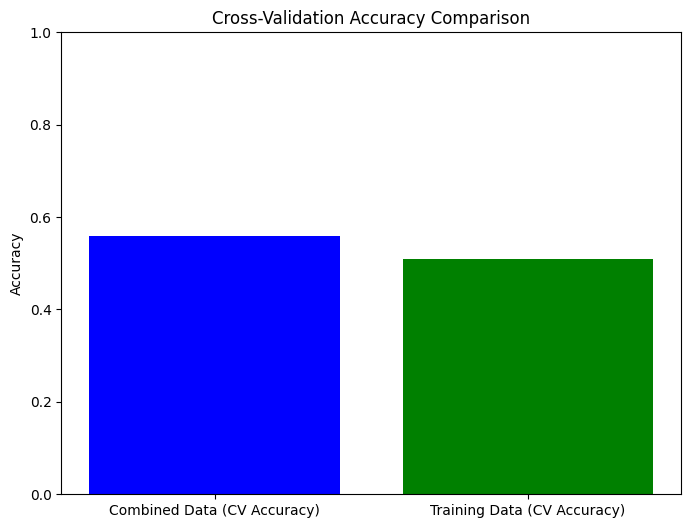

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores_train = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
print(f"Cross-validation accuracy on training data: {cv_scores_train.mean():.4f}")

cv_combined_avg = grid_search.best_score_
cv_train_avg = cv_scores_train.mean()

plt.figure(figsize=(8, 6))
plt.bar(['Combined Data (CV Accuracy)', 'Training Data (CV Accuracy)'],
        [cv_combined_avg, cv_train_avg],
        color=['blue', 'green'])
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()